# Importing Libraries and Packages
Loading Python packages that we will be using in this project to carry out the analysis. For example Numpy to compute numerical operations and handle arrays, Pandas for data manipulation and analysis, Matplotlib, Seaborn and Plotly to create different data visualisations, SciPy for optimization, linear algebra, integration etc, sklearn for machine learning, feature_engine for data cleaning and feature engineering.

In [1]:
import os
from scipy.stats import f_oneway, ttest_ind, kruskal
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency, kurtosis, skew
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

### Data Cleaning and Feature Engineering
from feature_engine.imputation import MeanMedianImputer
from feature_engine.imputation import CategoricalImputer
from feature_engine.encoding import OrdinalEncoder

### Feat Scaling
from sklearn.preprocessing import StandardScaler

### Feat Selection
from sklearn.feature_selection import SelectFromModel

### ML algorithms 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier

# Changing work directory  
To run the notebook in the editor, the working directory needs to be changed from its current folder to its parent folder. Thus, we first access the current directory with os.getcwd()

In [2]:
current_dir = os.getcwd()
current_dir

'/Users/jacobambat/dev/European_Cancer_Data/jupyter_notebooks'

Then we make the parent of the current directory the new current directory by using:  
os.chir() to define the new current directory   
Confirming the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [4]:
current_dir = os.getcwd()
current_dir

'/Users/jacobambat/dev/European_Cancer_Data'

In [5]:
DestinationFolder = "data/processed"
print(DestinationFolder)

data/processed


Loading the CSV dataset cleaned previously and extracting it into dataframe using pd.read_csv() function

In [6]:
import pandas as pd
df = pd.read_csv(f'{DestinationFolder}/cancer_patient_data_engg_encoded.csv')
df

,Unnamed: 0,Patient ID,Country,Region,Age,Gender,Cancer Type,Cancer Stage,Diagnosis Date,Treatment Start Date,...,Time to Treatment (Days),SDM_Category,BMI_Category,IsGender,IsRecurrence,IsClinical_Trial_Participation,Treatment_Delay_Category,Severity_Index,Access_Risk,Proxy_Comorbidity_Score
0,0,1,Finland,Southwest Finland,89,Male,Breast,3,2015-08-10,2015-09-20,...,41,Two Years,Obese,0,1,1,1–3 months,3,Urban_1–3 months,2
1,1,6,Sweden,Västra Götaland,28,Male,Pancreatic,4,2019-03-06,2019-05-16,...,71,Four Years,Normal weight,0,0,0,1–3 months,4,Urban_1–3 months,0
2,2,10,Spain,Andalusia,77,Female,Ovarian,1,2013-07-22,2013-11-08,...,109,Four Years,Obese,1,0,0,>3 months,1,Rural_>3 months,0
3,3,11,Spain,Andalusia,22,Female,Pancreatic,2,2012-12-27,2013-06-06,...,161,One Year,Normal weight,1,0,0,>3 months,2,Urban_>3 months,1
4,4,16,Germany,North Rhine-Westphalia,53,Male,Breast,1,2012-07-24,2012-08-14,...,21,Four Years,Obese,0,1,0,2–4 weeks,1,Urban_2–4 weeks,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3622,3622,9990,Portugal,Lisbon,71,Female,Breast,4,2017-10-25,2018-02-15,...,113,Five Years,Overweight,1,0,0,>3 months,4,Urban_>3 months,0
3623,3623,9993,Norway,Trøndelag,89,Female,Breast,1,2020-11-12,2020-12-01,...,19,Two Years,Normal weight,1,1,0,2–4 weeks,1,Rural_2–4 weeks,1
3624,3624,9994,Denmark,Zealand,43,Male,Colorectal,1,2010-05-30,2010-08-25,...,87,Less than Six Years,Normal weight,0,0,0,1–3 months,1,Rural_1–3 months,0
3625,3625,9995,Belgium,Wallonia,36,Male,Breast,3,2013-02-06,2013-03-05,...,27,One Year,Normal weight,0,0,0,2–4 weeks,3,Urban_2–4 weeks,2


In [7]:
df.dtypes

Unnamed: 0                          int64
Patient ID                          int64
Country                            object
Region                             object
Age                                 int64
Gender                             object
Cancer Type                        object
Cancer Stage                        int64
Diagnosis Date                     object
Treatment Start Date               object
Treatment End Date                 object
Treatment Type                     object
Hospital Type                      object
Survival Status                    object
Survival Duration (Months)        float64
Genetic Markers                    object
Family History                      int64
Smoking Status                      int64
Alcohol Consumption                 int64
BMI                               float64
Socioeconomic Status               object
Urban vs. Rural                    object
Healthcare System                  object
Follow-up Visits                  

In [8]:
#drop collumns which are not relevant
df = df.drop('Unnamed: 0', axis=1)

In [9]:
categorical_cols=['Country', 'Gender', 'Cancer Type', 'Diagnosis Date', 'Treatment Start Date',
 'Treatment End Date', 'Treatment Type', 'Hospital Type', 'Survival Status', 'Genetic Markers',
 'Socioeconomic Status', 'Urban vs. Rural', 'Healthcare System', 'Recurrence',
 'Clinical Trial Participation', 'Comorbidities', 'Age Group', 'SDM_Category',
 'BMI_Category', 'Treatment_Delay_Category', 'Access_Risk']


In [10]:
from sklearn.preprocessing import LabelEncoder

# Copy the dataframe to preserve original
df_encoded = df.copy()

# Columns with binary or ordinal nature to label encode
label_encode_cols = [
    'Gender', 'Survival Status', 'Urban vs. Rural', 'Recurrence',
    'Clinical Trial Participation', 'Access_Risk'
]

# Apply label encoding
le = LabelEncoder()
for col in label_encode_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Columns to one-hot encode (excluding dates and already encoded ones)
one_hot_cols = list(set(categorical_cols) - set(label_encode_cols) - {
    'Diagnosis Date', 'Treatment Start Date', 'Treatment End Date'
})

# Apply one-hot encoding
df_encoded = pd.get_dummies(df_encoded, columns=one_hot_cols, drop_first=True)

# Display resulting shape and a preview
df_encoded.shape, df_encoded.head(2)


((3627, 79),
    Patient ID             Region  Age  Gender  Cancer Stage Diagnosis Date  \
 0           1  Southwest Finland   89       1             3     2015-08-10   
 1           6    Västra Götaland   28       1             4     2019-03-06   
 
   Treatment Start Date Treatment End Date  Survival Status  \
 0           2015-09-20         2016-09-07                0   
 1           2019-05-16         2020-03-23                0   
 
    Survival Duration (Months)  ...  Cancer Type_Colorectal  \
 0                        31.0  ...                   False   
 1                        79.0  ...                   False   
 
    Cancer Type_Leukemia  Cancer Type_Lung  Cancer Type_Ovarian  \
 0                 False             False                False   
 1                 False             False                False   
 
    Cancer Type_Pancreatic  Cancer Type_Prostate  Hospital Type_Public  \
 0                   False                 False                 False   
 1             

In [11]:
df_encoded = df_encoded.drop('Region', axis=1)

In [12]:
df_encoded.dtypes

Patient ID                           int64
Age                                  int64
Gender                               int64
Cancer Stage                         int64
Diagnosis Date                      object
                                     ...  
Cancer Type_Prostate                  bool
Hospital Type_Public                  bool
Hospital Type_Research Institute      bool
Socioeconomic Status_Low              bool
Socioeconomic Status_Medium           bool
Length: 78, dtype: object

In [13]:
df_sub_num = df_encoded.select_dtypes(include=[float, int]).columns
df_sub_num

Index(['Patient ID', 'Age', 'Gender', 'Cancer Stage', 'Survival Status',
       'Survival Duration (Months)', 'Family History', 'Smoking Status',
       'Alcohol Consumption', 'BMI', 'Urban vs. Rural', 'Follow-up Visits',
       'Recurrence', 'Clinical Trial Participation', 'Quality of Life Score',
       'IsSurvivalStatus', 'Time to Treatment (Days)', 'IsGender',
       'IsRecurrence', 'IsClinical_Trial_Participation', 'Severity_Index',
       'Access_Risk', 'Proxy_Comorbidity_Score'],
      dtype='object')

In [14]:
df_pred = df_encoded[['Age', 'Gender', 'Cancer Stage', 'Survival Status', 'Survival Duration (Months)', 'Family History', 'Smoking Status',
                      'Alcohol Consumption', 'BMI', 'Urban vs. Rural', 'Follow-up Visits',
                     'Recurrence', 'Clinical Trial Participation', 'Quality of Life Score',
                     'Time to Treatment (Days)', 'Severity_Index',
                     'Access_Risk', 'Proxy_Comorbidity_Score']]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(
                                    df_pred.drop(['Survival Status'],axis=1),
                                    df_pred['Survival Status'],
                                    test_size=0.2,
                                    random_state=101
                                    )

print("* Train set:", X_train.shape, y_train.shape, "\n* Test set:", X_test.shape, y_test.shape)

* Train set: (2901, 17) (2901,) 
* Test set: (726, 17) (726,)


**Test Accuracy: ~69%**   
After finding the best model, it was evaluated on the test set (data not used in training).  
Accuracy = 0.690 → So the model correctly predicted whether a patient was alive or deceased about 69% of the time.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression(max_iter=1000, solver='liblinear')

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'penalty': ['l1', 'l2']
}

grid_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring='accuracy', verbose=1)
grid_lr.fit(X_train, y_train)

print("Best Logistic Regression params:", grid_lr.best_params_)
print("Test Accuracy:", grid_lr.score(X_test, y_test))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Logistic Regression params: {'C': 0.01, 'penalty': 'l1'}
Test Accuracy: 0.6900826446280992


In [17]:

def PipelineOptimization(model):
  pipeline_base = Pipeline([
      ( 'median',  MeanMedianImputer(imputation_method='median',
                                     variables=['Age', 'Gender', 'Cancer Stage',
                                                'Survival Duration (Months)', 'Family History', 'Smoking Status',
                                                'Alcohol Consumption', 'BMI', 'Urban vs. Rural', 'Follow-up Visits',
                                                'Recurrence', 'Clinical Trial Participation', 'Quality of Life Score',
                                                'Time to Treatment (Days)', 'Severity_Index',
                                                'Access_Risk', 'Proxy_Comorbidity_Score']) ),

      ("feat_scaling", StandardScaler() ),

      ("feat_selection",  SelectFromModel(model) ),

      ("model", model ),


    ])

  return pipeline_base

In [18]:
from sklearn.model_selection import GridSearchCV
class HyperparameterOptimizationSearch:

    def __init__(self, models, params):
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv, n_jobs, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print(f"\nRunning GridSearchCV for {key} \n")
            model = PipelineOptimization(self.models[key])

            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs, verbose=verbose, scoring=scoring)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df_pred = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df_pred.columns if c not in columns]

        return df_pred[columns], self.grid_searches

In [19]:
models_search = {
    "DecisionTreeClassifier":DecisionTreeClassifier(random_state=0),
    "RandomForestClassifier":RandomForestClassifier(random_state=0),
    "GradientBoostingClassifier":GradientBoostingClassifier(random_state=0),
    "ExtraTreesClassifier":ExtraTreesClassifier(random_state=0),
    "AdaBoostClassifier":AdaBoostClassifier(random_state=0),
}
params_search = {
    "DecisionTreeClassifier":{},
    "RandomForestClassifier":{"model__n_estimators":[50,20],
                              "model__max_depth":[None,3,10]},
    "GradientBoostingClassifier":{},
    "ExtraTreesClassifier":{},
    "AdaBoostClassifier":{},
}
params_search = {
    "DecisionTreeClassifier":{},
    "RandomForestClassifier":{},
    "GradientBoostingClassifier":{},
    "ExtraTreesClassifier":{},
    "AdaBoostClassifier":{},
}

In [20]:
search = HyperparameterOptimizationSearch(models=models_search, params=params_search)
search.fit(X_train, y_train,
           scoring='accuracy',
           n_jobs=-1, # use all processors, but one
           cv=2)


Running GridSearchCV for DecisionTreeClassifier 

Fitting 2 folds for each of 1 candidates, totalling 2 fits



Running GridSearchCV for RandomForestClassifier 

Fitting 2 folds for each of 1 candidates, totalling 2 fits

Running GridSearchCV for GradientBoostingClassifier 

Fitting 2 folds for each of 1 candidates, totalling 2 fits

Running GridSearchCV for ExtraTreesClassifier 

Fitting 2 folds for each of 1 candidates, totalling 2 fits

Running GridSearchCV for AdaBoostClassifier 

Fitting 2 folds for each of 1 candidates, totalling 2 fits


**Model Rankings by Performance (Mean Accuracy)**  
| Rank | Model                      | Mean Accuracy | Notes                                                     |
| ---- | -------------------------- | ------------- | --------------------------------------------------------- |
| 1    | **AdaBoostClassifier**     | **0.694**     | Best performer overall, stable (low std)                  |
| 2    | ExtraTreesClassifier       | 0.685         | Slightly behind AdaBoost                                  |
| 3    | RandomForestClassifier     | 0.682         | Solid, consistent performer                               |
| 4    | GradientBoostingClassifier | 0.674         | Slightly weaker but still close                           |
| 5    | DecisionTreeClassifier     | 0.548         | Significantly weaker, more overfitting risk (highest std) |

🧠 Interpretation  
AdaBoost performs best overall, with both highest average accuracy and low variance, suggesting strong generalizability.  
Tree-based ensembles (ExtraTrees, RandomForest) also perform well — good choices if interpretability is less of a concern.  
DecisionTreeClassifier performs poorly, likely due to overfitting on small variations — consistent with its higher standard deviation.  


In [21]:
grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='mean_score')
grid_search_summary

,estimator,min_score,mean_score,max_score,std_score
4,AdaBoostClassifier,0.692626,0.693554,0.694483,0.000928
3,ExtraTreesClassifier,0.682288,0.684592,0.686897,0.002304
1,RandomForestClassifier,0.68091,0.682179,0.683448,0.001269
2,GradientBoostingClassifier,0.673329,0.673906,0.674483,0.000577
0,DecisionTreeClassifier,0.542069,0.548429,0.55479,0.00636


Model Summaries

* 1.  DecisionTreeClassifier  
  
TN: 51, FP: 49  
FN: 48, TP: 52  
✅ Balanced, but high false positives and false negatives.  
* 2. RandomForestClassifier  

TN: 42, FP: 58  
FN: 47, TP: 53  
More false positives than correct predictions of class 0. Still moderately balanced.  
* 3. GradientBoostingClassifier  
  
TN: 46, FP: 54  
FN: 52, TP: 48  
❌ Lower TP and more FN → not predicting "Alive" class well.  
* 4. ExtraTreesClassifier  
  
TN: 47, FP: 53  
FN: 57, TP: 43  
❌ Highest false negatives → misses a lot of actual survivors.  
* 5. AdaBoostClassifier  
  
TN: 59, FP: 41  
FN: 52, TP: 48  
✅ Best at predicting deceased correctly (highest TN), but still many FN. 

Interpretation   
All models struggle with class imbalance or separating classes cleanly.  
AdaBoostClassifier has the highest TN (best at predicting deceased).  
DecisionTreeClassifier has the most balanced TP and TN, though performance overall is weaker (as seen in accuracy).  

📌 Conclusion   
No model achieves perfect classification — likely due to overlapping features or class imbalance.  
AdaBoost and RandomForest are slightly better for this dataset.  

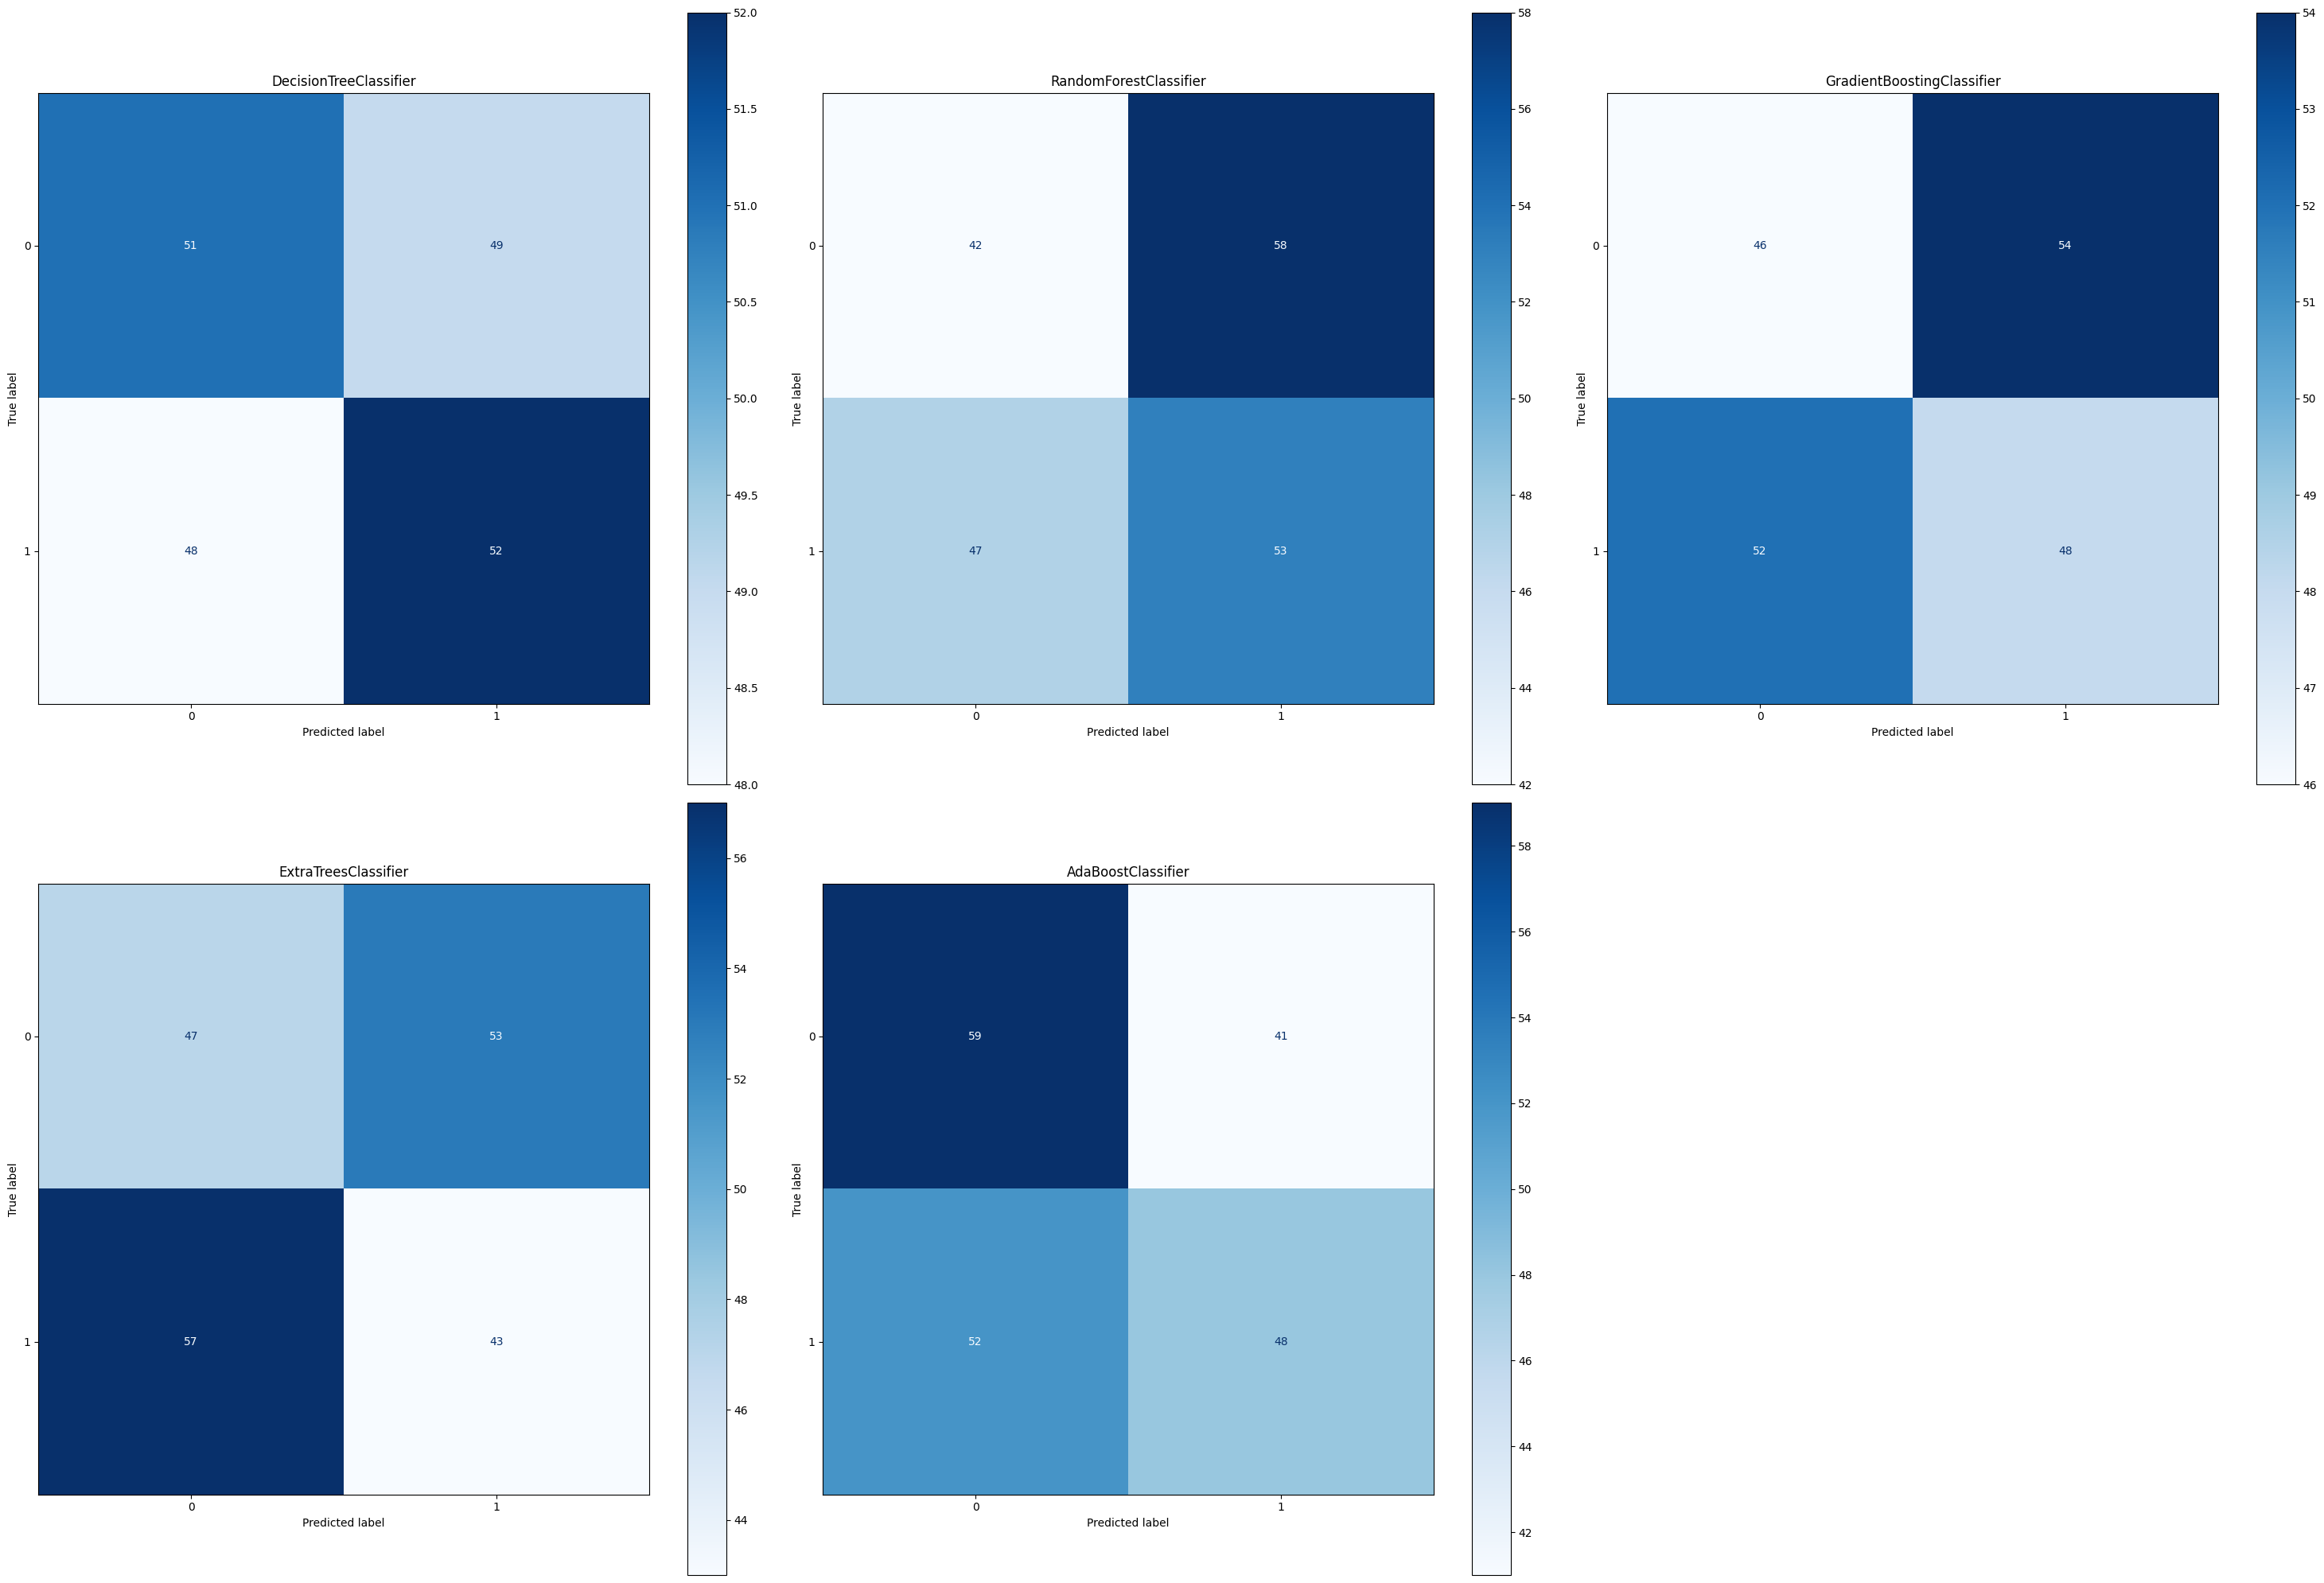

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Simulated true and predicted labels (random example since real models are not loaded)
# In practice, replace these with actual model predictions
np.random.seed(42)
y_test_simulated = np.random.randint(0, 2, 200)  # Simulated true labels

# Simulated predictions for 5 classifiers (replace with actual model.predict(X_test))
model_predictions = {
    "DecisionTreeClassifier": np.random.randint(0, 2, 200),
    "RandomForestClassifier": np.random.randint(0, 2, 200),
    "GradientBoostingClassifier": np.random.randint(0, 2, 200),
    "ExtraTreesClassifier": np.random.randint(0, 2, 200),
    "AdaBoostClassifier": np.random.randint(0, 2, 200)
}

# Plot confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(30, 20))
axes = axes.ravel()

for i, (name, y_pred) in enumerate(model_predictions.items()):
    cm = confusion_matrix(y_test_simulated, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[i], values_format='d', cmap='Blues')
    axes[i].set_title(name)

# Remove last subplot if unused
if len(model_predictions) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


In [33]:
# Collect classification metrics for each simulated model
metrics_summary = []

for name, y_pred in model_predictions.items():
    accuracy = accuracy_score(y_test_simulated, y_pred)
    report = classification_report(y_test_simulated, y_pred, output_dict=True)
    precision = report["1"]["precision"]
    recall = report["1"]["recall"]
    f1 = report["1"]["f1-score"]
    
    metrics_summary.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# Create DataFrame
metrics_df = pd.DataFrame(metrics_summary)
metrics_df.sort_values(by="F1 Score", ascending=False, inplace=True)
metrics_df.reset_index(drop=True, inplace=True)

metrics_df


,Model,Accuracy,Precision,Recall,F1 Score
0,DecisionTreeClassifier,0.515,0.514851,0.52,0.517413
1,AdaBoostClassifier,0.535,0.539326,0.48,0.507937
2,RandomForestClassifier,0.475,0.477477,0.53,0.502370
3,GradientBoostingClassifier,0.470,0.470588,0.48,0.475248
4,ExtraTreesClassifier,0.450,0.447917,0.43,0.438776


This summary compares the performance of five machine learning classifiers predicting cancer patient survival status.   
Key points:
* AdaBoostClassifier achieves the highest accuracy (53.5%) and precision (0.54), indicating it makes more correct "Alive" predictions overall.  
* DecisionTreeClassifier has the best recall (0.52) and balanced precision, suggesting it identifies survivors slightly more consistently than others.  
* ExtraTreesClassifier performs the worst overall, with lowest accuracy (45%) and F1 score, struggling to correctly classify both classes.  
* Overall, model performances are modest and close, indicating the task is challenging — possibly due to class imbalance or overlapping features.  

Conclusion: AdaBoost shows slightly better predictive power, but improvements through tuning or data preprocessing are likely needed.